In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import sqlalchemy

In [2]:
pwd = 'DS4A'
user = 'offcorss'
database ='offcorss'
host = 'data-offcorss.cirlxddueyc2.us-east-2.rds.amazonaws.com'
port = 5432
db = 'offcorss'
conn = sqlalchemy.create_engine(f'postgresql://{user}:{pwd}@{host}:{port}/{db}')


In [4]:
query_campaign = open('campaign.sql', 'r').readlines()[0]
query_catalog = open('catalogo.sql', 'r').readlines()[0]

In [5]:
catalog = pd.read_sql_query(query_catalog, conn)
# catalog.head()

In [6]:
campaign = pd.read_sql_query(query_campaign, conn)
# campaign.head()

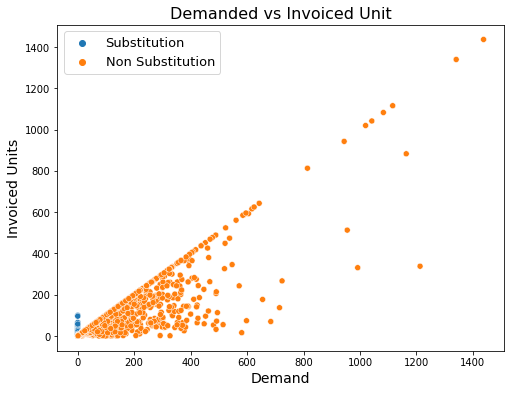

In [7]:
import seaborn as sns
plt.figure(figsize=(8,6))
subs = np.where((campaign['dda'] == 0) & (campaign['fac'] != 0), "Substitution", "Non Substitution")
sns.scatterplot(x='dda', y='fac', data = campaign, hue = subs);
plt.xlabel("Demand", fontsize= 14);
plt.ylabel("Invoiced Units", fontsize=14);
plt.legend(fontsize=13);
plt.title("Demanded vs Invoiced Unit", fontsize=16);

In [8]:
def filter_campaign(dat):
    """
    Function to filter campaign data to Moda Collection.
    """
    zero_demand = (dat['dda'] == 0)
    return dat[~zero_demand].copy().reset_index(drop=True)

campaign_valid = filter_campaign(campaign)

In [21]:
def get_clean_moda(camp, cat):
    moda_tmp = camp.merge(cat, how='inner')
    moda_clean = moda_tmp.drop_duplicates(subset='plu', keep ='first').set_index('plu')
    return moda_clean

In [23]:
moda_clean = get_clean_moda(campaign_valid, catalog)

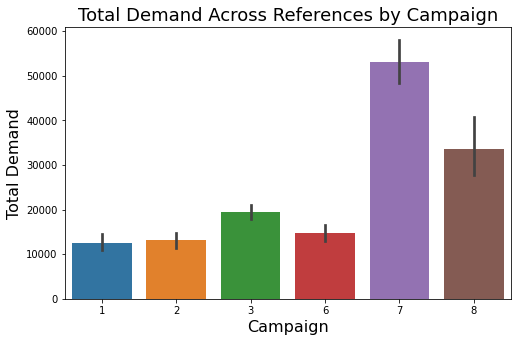

In [24]:
import seaborn as sns
plt.figure(figsize = (8, 5))
sns.barplot(x = 'campaign', y = 'dda', data = moda_clean, estimator=sum);
plt.xlabel('Campaign', fontsize = 16)
plt.ylabel('Total Demand', fontsize = 16)
plt.title('Total Demand Across References by Campaign', fontsize = 18);

In [13]:
# CREATE TABLE catalogo(
#     genero CHAR(15),
#     mundo VARCHAR(25),
#     clasificacion VARCHAR(30),
#     pagina VARCHAR(20),
#     plu INT,
#     mes_moda VARCHAR(30),
#     expocision CHAR(30),
#     num_apariciones VARCHAR(15),
#     portada VARCHAR(15),
#     zomm_producto VARCHAR(15),
#     peso_exhibicion VARCHAR(15),
#     estampado_p_superiores CHAR(20),
#     estampado_p_inferiores CHAR(20),
#     ocurrencia CHAR(15)
# );

In [14]:
# CREATE TABLE campanas(
#     year INT, 
#     campaign INT, 
#     region VARCHAR(20), 
#     desc_zona VARCHAR(25), 
#     num_zona INT,
#     clasificacion VARCHAR(20), 
#     estrategia VARCHAR(30), 
#     grupo_articulo CHAR(30), 
#     tipo_prenda CHAR(30), 
#     documentocliente  INT, 
#     numero_pedido INT, 
#     referencia INT, 
#     color_comercial VARCHAR(25), 
#     codigo_color VARCHAR(30), 
#     talla VARCHAR (25), 
#     sku_plu INT, 
#     precio_catalogo INT,
#     cost FLOAT,
#     dda_und INT,
#     fac_und INT,
#     dda_precio INT,
#     fac_precio FLOAT,
#     margen FLOAT,
#     nivel_servicio FLOAT,
#     num_pedidos INT,
#     npu_d FLOAT,
#     upe_d FLOAT,
#     orden_promedio FLOAT
# );

In [15]:
moda_clean.columns

Index(['campaign', 'clasificacion', 'tipo_prenda', 'color_comercial',
       'codigo_color', 'talla', 'grupo_articulo', 'dda', 'fac', 'precio',
       'upe', 'genero', 'mundo', 'pagina', 'mes_moda', 'expocision',
       'num_apariciones', 'portada', 'zomm_producto', 'peso_exhibicion',
       'estampado_p_superiores', 'estampado_p_inferiores', 'ocurrencia',
       'color'],
      dtype='object')

In [ ]:
class DataObject:
    def __init__(self, table):
        self.raw_df = table
        
    def agrupar_color(self, color):
        s = color
        if  ('Azul' == s) | ('Gris' == s) | ('Rosado'  == s) | ('Café' == s)  | ('Morado' == s)  | ('Amarillo'  == s)  | ('Blanco' == s) | ('Verde'  == s)  | ('Negro'  == s)   | ('Rojo' == s) | ('Naranja'  == s)  :
            return s
        elif  ('Azul Flores' == s) | ('Azul Dinosaurio' == s) |  ('Azul León' == s) | ('Índigo Medio' == s) | ('Índigo Claro' == s) | ('Azul con estrellas' == s) | ('Indigo negro' == s) | ('Índigo'  == s)  | ('Indigo Claro'  == s) |  ('Indigo Oscuro'  == s)  |  ('Azul rayas'  == s)  |  ('Turquesa'  == s)  |  ('Indigo Medio'  == s) :
            return 'Azul'
        elif ('Coral' == s) | ('Rosado/ Estampado' == s) | ('coral neon' == s):
            return 'Rosado'
        elif ('Gris Perro' == s) | ('Gris Koala' == s) | ('plateado' == s) | ('gris' == s)  | ('Gris Jaspe' == s) | ('Gris Gato' == s)  | ('Gris militar' == s) | ('Gris jaspe' == s) | ('Gris Oso' == s) | ('Gris Tiburón' == s) | ('Gris Estrellas' == s)  | (' Gris militar' == s)       :
            return 'Gris'
        elif ('Cafe' == s) | ('Café Gorila' == s) | ('Café León'== s)  :
            return 'Café'
        elif ('Violeta' == s) | ('Fucsia' == s):
            return 'Morado'
        elif ('Mostaza' == s) | ('Arena' == s) :
            return 'Amarillo'
        elif  ('Negro con letra' == s) | ('Negro Cocodrilo' == s) :
            return 'Negro'
        elif   ('Rosado Cerdito' == s) | ('Rosado Tigre' == s)  | ('Rosado Perro' == s)   :
            return 'Rosado'
        elif ('Naranja Tigre' == s) :
            return 'Naranja'
        elif   ('Blanco /Estampado' == s) | ('Beige' == s) | ('Blanco Conejo' == s) | ('Blanco Zorro' == s) :
            return 'Blanco'
        elif ('Camuflado' == s)  |  ('Verde Neón'  == s)    :
            return 'Verde'
        elif ('S== REGISTRO' == s):
            return 'S== Dato'
        else:
            return  'MIXTO'
        
    def color(self):
        self.raw_df['color'] = self.raw_df['color_comercial'].apply(agrupar_color)
    

In [32]:
moda_clean['color'] = moda['color_comercial'].apply(agrupar_color)

In [33]:
# def clean_stamps():
stamp_map = {'ESTAMPADO EN FRENTE':'frente', 
 'TELA CONTINUA':'continuo', 
 'SIN REGISTRO':'na-no stamp',
 'RAYAS':'rayas',
 'SIN ESTAMPADO':'na-no stamp',
 'BLOQUES': 'bloque', 
 'ESTAMPADO LOCALIZADO':'localizado',
 'NO APLICA':'na-no stamp'}

stamp_sup = moda_clean['estampado_p_superiores'].str.strip().map(stamp_map)
stamp_inf = moda_clean['estampado_p_inferiores'].str.strip().map(stamp_map)
moda_clean['stamp_sup'] = np.where(stamp_sup != 'na-no stamp', 1, 0)
moda_clean['stamp_inf'] = np.where(stamp_inf != 'na-no stamp', 1, 0)

In [34]:

import unidecode
#convert plain text to utf-8
# def clean_sizes():
mundo = moda_clean['mundo'].str.split().apply(lambda x: unidecode.unidecode(x[0].lower()))
mundo_map = {'nino':'6-16 yo', 'nina':'6-16 yo', 'bebe':'1-5 yo', 'primi':'0-18 mo', 'unisex':'unisex', 'otros':'other'}
moda_clean['size_group'] = mundo.map(mundo_map)

In [35]:
moda_clean['zoom'] = moda_clean['zomm_producto'].astype(float)
moda_clean['expo_weight'] = moda_clean['peso_exhibicion'].astype(float)
moda_clean['genero'] = moda_clean['genero'].str.strip()
moda_clean['expocision'] = moda_clean['expocision'].str.strip()

In [36]:
# def clean_item_group():
item_group = {'tops': ['CAMISETA', 'BUZO O CHAQUETA', 'CAMISA'], 
             'bottoms': ['PANTALON LARGO', 'PANTALON CORTO', 'FALDA'],
             'full': ['CONJUNTO', 'VESTIDO', 'SET', 'OVERALL', 'BODY', 'ENTERIZO EXTERIOR'], 
             'accesories': ['ACCESORIO', 'SOMBRERO']}
item_map = {i:k  for k, v in item_group.items() for i in v}
moda_clean['item_type'] = moda_clean['grupo_articulo'].map(item_map)

In [37]:
# def clean_pages():
moda_clean['page_group'] = pd.cut(moda_clean['pagina'].str.replace('[A-Za-z]', '').astype(int), bins=[0, 20, 40, 60, 80, 100, 120])

In [38]:
cat_cols = ['size_group', 'item_type', 'color', 'stamp_sup', 
            'stamp_inf', 'genero', 'expocision', 'page_group']
# moda_clean['campaign'] = moda_clean['campaign'].astype('category')

In [39]:
moda_cat_wide = pd.get_dummies(moda_clean[cat_cols])

In [40]:

moda_clean['precio_scl'] = (moda_clean['precio'] - moda_clean['precio'].mean())/moda_clean['precio'].std()
num_cols = ['precio_scl', 'zoom', 'expo_weight', 'campaign']

In [41]:
X = pd.concat([moda_clean[num_cols], moda_cat_wide], 1)
y = moda_clean['dda']

In [42]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state=42)
expo_model = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Poisson()).fit()
expo_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    dda   No. Observations:                 1653
Model:                            GLM   Df Residuals:                     1618
Model Family:                 Poisson   Df Model:                           34
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36656.
Date:                Sat, 31 Oct 2020   Deviance:                       64293.
Time:                        12:44:27   Pearson chi2:                 7.38e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   1.6123      0.043     37.401      0.000       1.528       1.697
precio_scl                             -0.5189      0.006    -93.807      0.000      -0.530      -0.508
zoom                                    0.1048      0.010     10.031      0.000       0.084       0.125
expo_weight                             0.1918      0.017     11.154      0.000       0.158       0.226
campaign                                0.0362      0.002     19.327      0.000       0.032       0.040
stamp_sup                               0.0084      0.013      0.640      0.522      -0.017       0.034
stamp_inf                               0.2998      0.009     32.960      0.000       0.282       0.318
size_group_0-18 mo                      0.1106      0.013      8.448      0.000       0.085       0.136
size_group_1-5 yo                       0.1666      0.010     17.224      0.000       0.148       0.186
size_group_6-16 yo                      0.0830      0.010      7.993      0.000       0.063       0.103
size_group_other                        0.7526      0.013     56.045      0.000       0.726       0.779
size_group_unisex                       0.4996      0.019     26.728      0.000       0.463       0.536
item_type_accesories                    0.9420      0.029     31.942      0.000       0.884       1.000
item_type_bottoms                      -0.4552      0.024    -19.009      0.000      -0.502      -0.408
item_type_full                          0.4528      0.024     18.866      0.000       0.406       0.500
item_type_tops                         -0.3732      0.025    -15.032      0.000      -0.422      -0.325
color_Amarillo                          0.3881      0.011     34.617      0.000       0.366       0.410
color_Azul                              0.2737      0.010     28.252      0.000       0.255       0.293
color_Blanco                            0.2084      0.010     21.766      0.000       0.190       0.227
color_Café                              0.4142      0.023     18.250      0.000       0.370       0.459
color_Gris                              0.0636      0.011      5.915      0.000       0.043       0.085
color_MIXTO                            -0.3586      0.031    -11.525      0.000      -0.420      -0.298
color_Morado                            0.1003      0.027      3.647      0.000       0.046       0.154
color_Naranja                          -0.3789      0.036    -10.548      0.000      -0.449      -0.308
color_Negro                            -0.0284      0.018     -1.570      0.116      -0.064       0.007
color_Rojo                              0.3731      0.025     15.015      0.000       0.324       0.422
color_Rosado                            0.3591      0.010     36.46

In [106]:
pred_table = expo_model.get_prediction().summary_frame()
y_pred = expo_model.predict(sm.add_constant(X_valid))

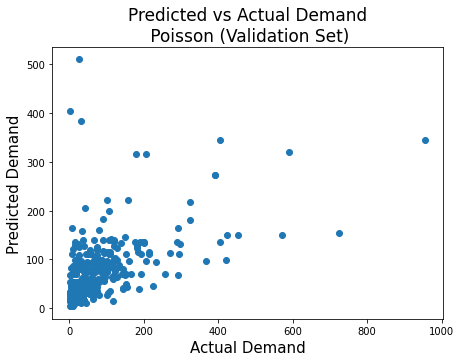

In [109]:
plt.figure(figsize = (7,5))
plt.scatter(y_valid, y_pred)
plt.title('Predicted vs Actual Demand\n Poisson (Validation Set)', fontsize = 17);
plt.xlabel("Actual Demand", fontsize = 15);
plt.ylabel('Predicted Demand', fontsize = 15);

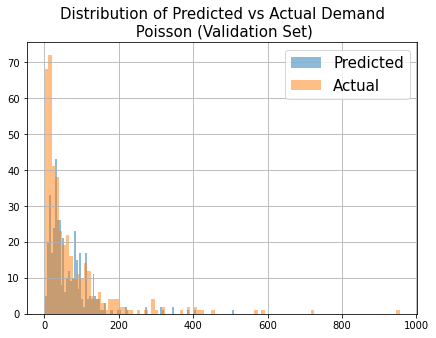

In [111]:
plt.figure(figsize = (7,5))
y_pred.hist(alpha=0.5, bins = 100, label = 'Predicted');
y_valid.hist(alpha=0.5, bins = 100, label = 'Actual');
plt.title('Distribution of Predicted vs Actual Demand\n Poisson (Validation Set)', fontsize = 15);
plt.legend(fontsize = 15);

In [45]:
def assertive_score(y_true, y_pred, epsilon=0.25):
    error = np.log(y_true/y_pred)
    return (abs(error) < epsilon).sum()/len(y_true)

In [49]:
assertive_score(y_valid, y_pred, 0.50)

0.45410628019323673

In [71]:
from sklearn.linear_model import ElasticNetCV
enet = ElasticNetCV(fit_intercept=True, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv = 10)
enet.fit(X_train, np.log(y_train))
list(zip(X_train.columns, enet.coef_))

[('precio_scl', -0.4815555838819478),
 ('zoom', 0.15369729737370566),
 ('expo_weight', 0.49838003994246177),
 ('campaign', -0.00989789411353082),
 ('stamp_sup', 0.18123141722196176),
 ('stamp_inf', 0.1662725418639746),
 ('size_group_0-18 mo', -0.6458615409771987),
 ('size_group_1-5 yo', -0.0),
 ('size_group_6-16 yo', -0.04410934357449701),
 ('size_group_other', 0.5192029743867763),
 ('size_group_unisex', 0.3695993074668096),
 ('item_type_accesories', 0.3675592472177763),
 ('item_type_bottoms', -0.22853047990631958),
 ('item_type_full', 0.41228753777360916),
 ('item_type_tops', -0.5388926125683315),
 ('color_Amarillo', 0.16381645664139138),
 ('color_Azul', 0.03071956560290366),
 ('color_Blanco', 0.03744825406781346),
 ('color_Café', 0.05073095502952686),
 ('color_Gris', -0.12881821813585942),
 ('color_MIXTO', -0.18485525807333208),
 ('color_Morado', -0.2226777275848274),
 ('color_Naranja', -0.40102020957581686),
 ('color_Negro', -0.0),
 ('color_Rojo', -0.05301463072869999),
 ('color_Ros

In [50]:
aux_ols = ((y_train - expo_model.mu)**2 - y_train) / expo_model.mu

In [51]:
aux_model = sm.OLS(aux_ols, expo_model.mu).fit()
aux_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    dda   R-squared (uncentered):                   0.113
Model:                            OLS   Adj. R-squared (uncentered):              0.112
Method:                 Least Squares   F-statistic:                              210.2
Date:                Sat, 31 Oct 2020   Prob (F-statistic):                    6.38e-45
Time:                        12:46:12   Log-Likelihood:                         -10734.
No. Observations:                1653   AIC:                                  2.147e+04
Df Residuals:                    1652   BIC:                                  2.148e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5793      0.040     14.497      0.000       0.501       0.658
==============================================================================
Omnibus:                     2835.311   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1942532.324
Skew:                          11.588   Prob(JB):                         0.00
Kurtosis:                     169.333   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
nb_model = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.NegativeBinomial(alpha = aux_model.params[0])).fit()

In [117]:
nb_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    dda   No. Observations:                 1653
Model:                            GLM   Df Residuals:                     1618
Model Family:        NegativeBinomial   Df Model:                           34
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8070.8
Date:                Sat, 31 Oct 2020   Deviance:                       1769.6
Time:                        15:38:55   Pearson chi2:                 1.80e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   1.6580      0.157     10.588      0.000       1.351       1.965
precio_scl                             -0.4811      0.029    -16.492      0.000      -0.538      -0.424
zoom                                    0.1136      0.062      1.842      0.066      -0.007       0.235
expo_weight                             0.4468      0.111      4.011      0.000       0.228       0.665
campaign                                0.0164      0.011      1.444      0.149      -0.006       0.039
stamp_sup                               0.0944      0.076      1.247      0.212      -0.054       0.243
stamp_inf                               0.1527      0.062      2.466      0.014       0.031       0.274
size_group_0-18 mo                     -0.0822      0.082     -1.007      0.314      -0.242       0.078
size_group_1-5 yo                       0.3162      0.056      5.616      0.000       0.206       0.426
size_group_6-16 yo                      0.1564      0.061      2.585      0.010       0.038       0.275
size_group_other                        0.7140      0.146      4.894      0.000       0.428       1.000
size_group_unisex                       0.5536      0.195      2.846      0.004       0.172       0.935
item_type_accesories                    1.0120      0.168      6.021      0.000       0.683       1.341
item_type_bottoms                      -0.3503      0.108     -3.229      0.001      -0.563      -0.138
item_type_full                          0.3804      0.125      3.052      0.002       0.136       0.625
item_type_tops                         -0.4791      0.117     -4.099      0.000      -0.708      -0.250
color_Amarillo                          0.3517      0.071      4.978      0.000       0.213       0.490
color_Azul                              0.2452      0.059      4.150      0.000       0.129       0.361
color_Blanco                            0.2595      0.059      4.406      0.000       0.144       0.375
color_Café                              0.5147      0.206      2.504      0.012       0.112       0.918
color_Gris                              0.0927      0.065      1.436      0.151      -0.034       0.219
color_MIXTO                            -0.0752      0.155     -0.486      0.627      -0.378       0.228
color_Morado                           -0.0474      0.155     -0.306      0.760      -0.351       0.257
color_Naranja                          -0.5429      0.226     -2.402      0.016      -0.986      -0.100
color_Negro                             0.0369      0.119      0.311      0.756      -0.196       0.270
color_Rojo                              0.0963      0.199      0.483      0.629      -0.294       0.487
color_Rosado                            0.3829      0.065      5.86

In [118]:
nb_preds = nb_model.predict(sm.add_constant(X_valid))

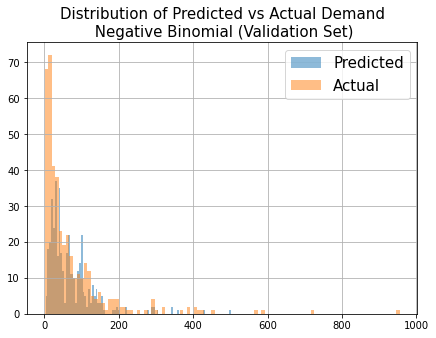

In [119]:
plt.figure(figsize = (7,5))
nb_preds.hist(alpha=0.5, bins = 100, label = 'Predicted');
y_valid.hist(alpha=0.5, bins = 100, label = 'Actual');
plt.title('Distribution of Predicted vs Actual Demand\n Negative Binomial (Validation Set)', fontsize = 15);
plt.legend(fontsize = 15);

In [58]:
assertive_score(y_valid, nb_preds, 0.50)

0.45893719806763283

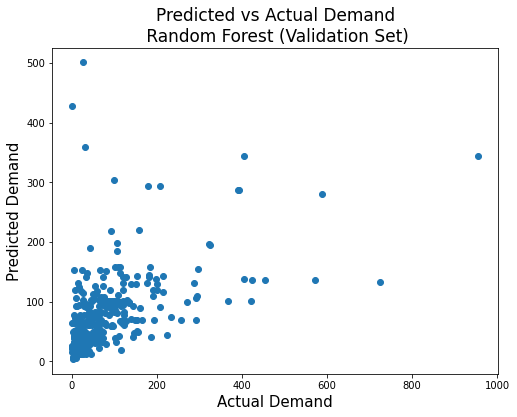

In [95]:
plt.figure(figsize = (8, 6))
plt.scatter(y_valid, nb_preds)
plt.title('Predicted vs Actual Demand\n Random Forest (Validation Set)', fontsize = 17);
plt.xlabel("Actual Demand", fontsize = 15);
plt.ylabel('Predicted Demand', fontsize = 15);


In [70]:
from sklearn.metrics import make_scorer
assertivity = make_scorer(assertive_score)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=42)

param_grid = {'max_depth': [3, 5, 10], 
              'n_estimators': [10, 50, 100, 500, 2000],
              'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(forest, param_grid, cv = 10, scoring=assertivity, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_forest = grid_search.best_estimator_

y_pred = best_forest.predict(X_valid)



In [78]:
assertive_score(y_valid, y_pred, 0.50)

# list(zip(X_train.columns, best_forest.feature_importances_))

0.5434782608695652

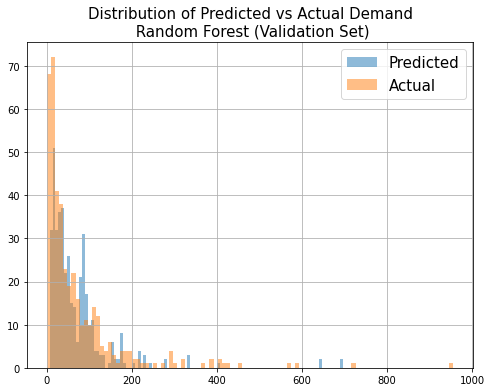

In [91]:
plt.figure(figsize = (8, 6))
pd.Series(y_pred).hist(alpha=0.5, bins = 100, label = 'Predicted');
y_valid.hist(alpha=0.5, bins = 100, label = 'Actual');
plt.title('Distribution of Predicted vs Actual Demand\n Random Forest (Validation Set)', fontsize = 15);
plt.legend(fontsize = 15);

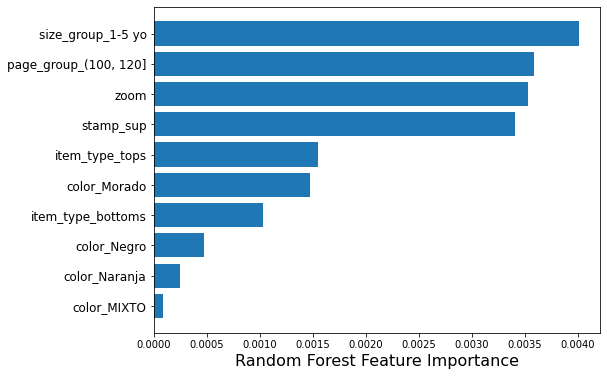

In [103]:
sorted_idx = best_forest.feature_importances_.argsort()
plt.figure(figsize = (8,6))
plt.barh(X_train.columns[sorted_idx][:10], best_forest.feature_importances_[sorted_idx][:10])
plt.xlabel("Random Forest Feature Importance", fontsize=16);
plt.yticks(fontsize = 12);

In [73]:
from sklearn.feature_selection import SelectFromModel
fs = SelectFromModel(best_forest)
fs.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(max_depth=10,
                                                min_samples_split=10,
                                                n_estimators=50,
                                                random_state=42))

In [74]:
feat_labels = X_train.columns
for feature_list_index in fs.get_support(indices=True):
    print(feat_labels[feature_list_index])

precio_scl
campaign
size_group_0-18 mo
item_type_full
color_Rosado
color_Verde
expocision_MODELADO


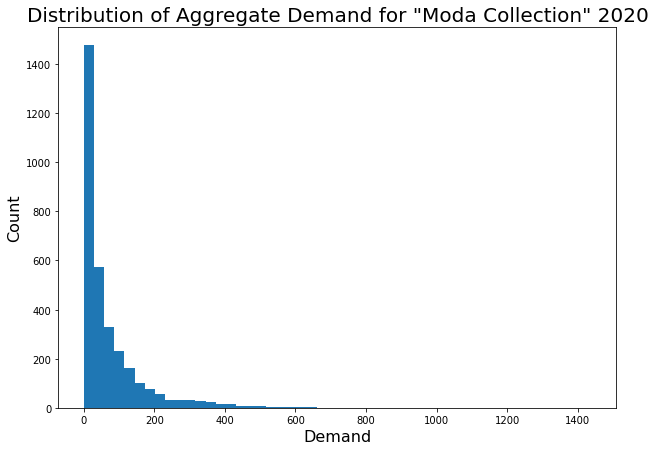

In [373]:
plt.figure(figsize = (10, 7))
campaign['dda'].plot(kind = 'hist', bins = 50);
plt.xlabel('Demand', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Distribution of Aggregate Demand for "Moda Collection" 2020', fontsize = 20);

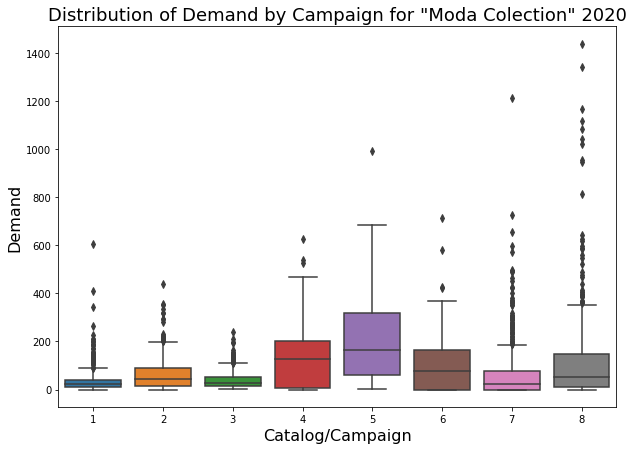

In [375]:
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'campaign', y = 'dda', data = campaign);
plt.xlabel('Catalog/Campaign', fontsize = 16);
plt.ylabel('Demand', fontsize = 16);
plt.title('Distribution of Demand by Campaign for "Moda Colection" 2020', fontsize = 18);

In [170]:
import statsmodels.api as sm

y = full_campaigns['DDA UND']
X = full_campaigns['CAMPAÑA']
X_wide = pd.get_dummies(X)

raw_model = sm.GLM(y, X_wide, family=sm.families.Poisson()).fit()
raw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                DDA UND   No. Observations:                 2210
Model:                            GLM   Df Residuals:                     2203
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -69861.
Date:                Sat, 10 Oct 2020   Deviance:                   1.2770e+05
Time:                        20:32:54   Pearson chi2:                 1.75e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
1              3.6631      0.007    497.417      0.000       3.649       3.678
2              3.8005      0.009    441.697      0.000       3.784       3.817
3              3.6880      0.007    516.098      0.000       3.674       3.702
4              4.6359      0.015    308.694      0.000       4.606       4.665
5              5.0678      0.008    654.456      0.000       5.053       5.083
6              4.9576      0.006    832.000      0.000       4.946       4.969
7              4.5083      0.004   1051.177      0.000       4.500       4.517
==============================================================================
"""

As we can see, we notice that indeed campaign 4, 5, 6 have a positive impact on the demand and the coefficients are significant. For a model such as this one, we'll need to account for important disgnostics such as overdispersion and zero inflated responses, and we'll need to be careful with interpretation. Up to now we have only looked at the direction of the relationships for the campaigns.

#### Exposure, picture format + picture weigth

We'd like to know if the way the items are displayed has any effect on the demand at an aggregate general level. We'll drop the entry which may be related to the "virtual" reference, which will not be displayed in the physical catalog. Additionally, we want to correct for the weight of exposure in the page, which is a number between zero and one depending on the percentage of the page covered by the image

In [241]:
# There are trailing spaces which give us the illusion of more groups
full_campaigns['EXPOSICIÓN'].value_counts()

MODELADO                     1239
FOTO PRODUCTO                 858
MODELADO Y FOTO PRODUCTO       53
MODELADO                       37
MODELADO Y FOTO PRODUCTO       22
SIN REGISTRO                    1
Name: EXPOSICIÓN, dtype: int64

In [242]:
exposure = full_campaigns[full_campaigns['EXPOSICIÓN'] != 'SIN REGISTRO'].copy()

In [243]:
exposure['EXPOSICIÓN'] = exposure['EXPOSICIÓN'].str.strip()

In [244]:
y = exposure['DDA UND']
expo_wide = pd.get_dummies(exposure['EXPOSICIÓN'], drop_first=True)
expo_wide['expo_weigth'] = exposure['PESO_ EXHIBICIÓN'].values.astype('float')
expo_model = sm.GLM(y, sm.add_constant(expo_wide), family=sm.families.Poisson()).fit()
expo_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                DDA UND   No. Observations:                 2209
Model:                            GLM   Df Residuals:                     2205
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -76197.
Date:                Sat, 10 Oct 2020   Deviance:                   1.4038e+05
Time:                        21:04:16   Pearson chi2:                 2.27e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.1057      0.006    699.255      0.000       4.094       4.117
MODELADO                    -0.7183      0.005   -134.282      0.000      -0.729      -0.708
MODELADO Y FOTO PRODUCTO     0.0885      0.011      8.028      0.000       0.067       0.110
expo_weigth                  0.9753      0.010    100.914      0.000       0.956       0.994
============================================================================================
"""

According to this model, there is a negative relationship for products that don't have picture, after controlling for exposure weight. Finally, the weight of the picture in the catalog has a positive relationship with the demand after controlling for all types of display used in the catalog.